# TP – Classi cation Arborescente sur le Dataset Titanic

🎯 Objectif
 Construire, visualiser, évaluer et comparer un Arbre de Décision et une Random Forest à partir du dataset
 Titanic.

🔗 Jeu de données
 Dataset : Titanic - Machine Learning from Disaster
 Lien : https://www.kaggle.com/c/titanic/data

Partie 1 – Chargement & Exploration

1- Chargez le jeu de données Titanic. 
Affichez les 5 premières lignes et les types de données. Que remarquez-vous ?

Il existe des valeurs nulls

In [238]:
import pandas as pd

data = pd.read_csv("6_train.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2 - Combien y a-t-il de passagers au total ? Combien de survivants ? Calculez les proportions.

In [239]:
print(f"Le nombre total de passager {data.shape[0]}")
print(f"Le nombre total de survivants {data[data['Survived'] == 1].shape[0]}")
print(f"Le nombre total de non survivants {data[data['Survived'] == 0].shape[0]}")


proportion  = data[data['Survived'] == 1].shape[0] / data.shape[0]
print(f"La proportion de survivants est {proportion:.2%} = {proportion:.2f}")


Le nombre total de passager 891
Le nombre total de survivants 342
Le nombre total de non survivants 549
La proportion de survivants est 38.38% = 0.38


3. Identifiez les colonnes avec des valeurs manquantes. Pour chaque colonne concernée, indiquez le
 nombre et le pourcentage de valeurs manquante

In [240]:
print("les valeurs manquantes")
data_null = data.isnull().sum()
print(data_null)
#nombre et pourcentage des valeurs manquantes
print(data_null / data.shape[0] * 100)


les valeurs manquantes
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


## Partie 2 – Nettoyage & Préparation

 4
 . Imputez les valeurs manquantes : 
Age
 par la médiane, 
Embarked
 par la modalité la plus fréquente.

In [241]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

 6
 . Créez une nouvelle variable 
Title
 à partir de 
Name
 . Est-ce une variable informative ? Visualisez sa
 distribution.

In [242]:
data['Title'] = data['Name'].str.extract('(Mr|Mrs|Miss|Master|Dr|Rev|Col|Major|Sir|Don|Lady|Countess|Jonkheer|Capt|Ms|Mme|Mlle)')

5
 . Supprimez les colonnes inutiles : 
PassengerId
 , 
Name
 , 
Ticket
 , 
Cabin
 . Justi ez ce choix.

In [243]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


Partie 3 – Encodage & Prétraitement

7
 . Encodez les variables catégorielles (
 Sex
 , 
Embarked
 , 
Title
 ) à l’aide de 
LabelEncoder
 ou
 OneHotEncoder
 . Testez les deux méthodes.

In [244]:
from sklearn.preprocessing import LabelEncoder
#Encodez les variables catégorielles ( Sex, Embarked, Title ) à l’aide de LabelEncoder 
encodeur = LabelEncoder()
data['Sex'] = encodeur.fit_transform(data['Sex'])
data['Embarked'] = encodeur.fit_transform(data['Embarked'])
data['Title'] = encodeur.fit_transform(data['Title'])


print(data.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title
0         0       3    1  22.0      1      0   7.2500         2     12
1         1       1    0  38.0      1      0  71.2833         0     12
2         1       3    0  26.0      0      0   7.9250         2      9
3         1       1    0  35.0      1      0  53.1000         2     12
4         0       3    1  35.0      0      0   8.0500         2     12


Est-ce une variable informative ?

Oui c'est une variable informative

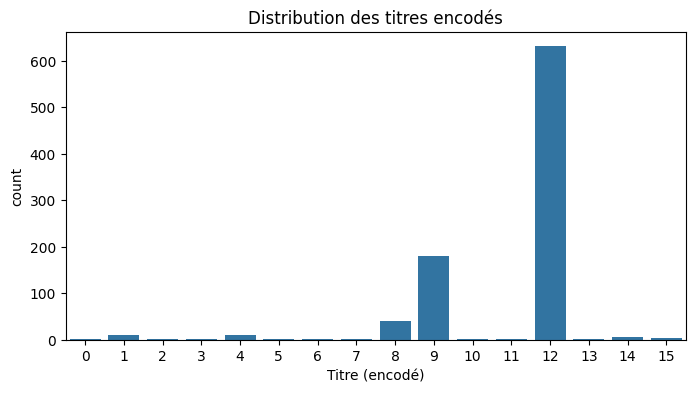

{'Capt': np.int64(0), 'Col': np.int64(1), 'Countess': np.int64(2), 'Don': np.int64(3), 'Dr': np.int64(4), 'Jonkheer': np.int64(5), 'Lady': np.int64(6), 'Major': np.int64(7), 'Master': np.int64(8), 'Miss': np.int64(9), 'Mlle': np.int64(10), 'Mme': np.int64(11), 'Mr': np.int64(12), 'Ms': np.int64(13), 'Rev': np.int64(14), 'Sir': np.int64(15)}


In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.countplot(x='Title', data=data)
plt.title("Distribution des titres encodés")
plt.xlabel("Titre (encodé)")
plt.show()

print(dict(zip(encodeur.classes_, encodeur.transform(encodeur.classes_))))


8
 . Standardisez 
Age
 et 
Fare
 avec 
StandardScaler
 . Pourquoi cette étape peut-elle être utile même
 avec des arbres ?

Ce que cela fait :
Chaque valeur dans Age et Fare sera transformée pour avoir :
- moyenne = 0
- écart-type = 1

C’est utile pour les algorithmes sensibles aux échelles (comme la régression, SVM, KNN, etc.).

In [246]:
from sklearn.preprocessing import StandardScaler

# 1. Instancier le scaler
scaler = StandardScaler()

# 2. Appliquer le scaler aux colonnes Age et Fare
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

9
 . Divisez le dataset en X et y. Cible = 
Survived
 . Faites un 
train_test_split
 (70/30) avec
 random_state=42
 .

In [247]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(623, 8)
(268, 8)
(623,)
(268,)


 Partie 4 – Visualisation & Analyse Exploratoire

10 - A chez la heatmap des corrélations. Quelles sont les variables les plus corrélées avec 
Survived
 ?

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')
Correlation sorted by 'Survived':
Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Embarked   -0.167675
Title      -0.234564
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64


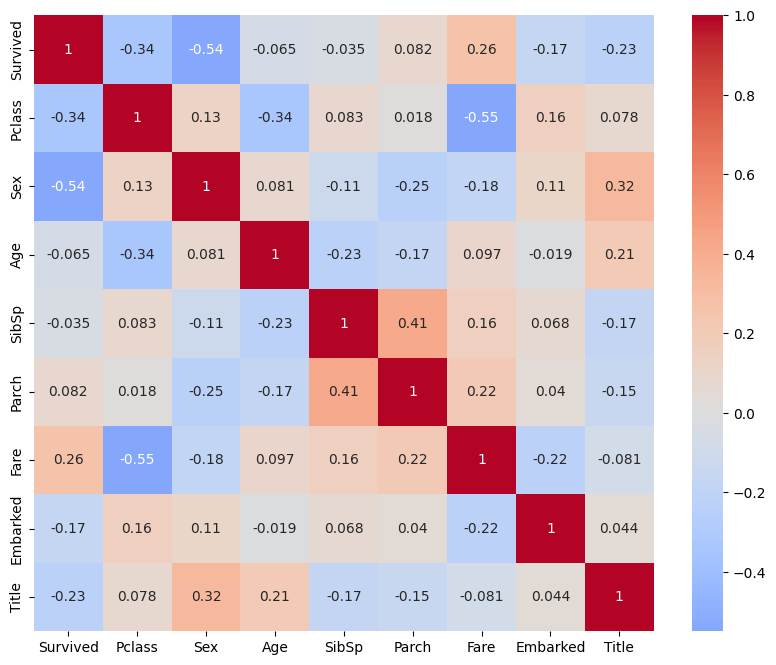

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt
#les colonne numérique
cols_num = data.select_dtypes(include=['int64', 'float64'])
print(cols_num.columns)
correlation = data[cols_num.columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)

# Sorted correlations - example: sort by average_score
print("Correlation sorted by 'Survived':")
print(correlation['Survived'].sort_values(ascending=False))


 11. Réalisez des barplots de survie par 
Sex
 , 
Pclass
 , 
Embarked
 , et 
Title
 . Qu’en concluez-vous ?

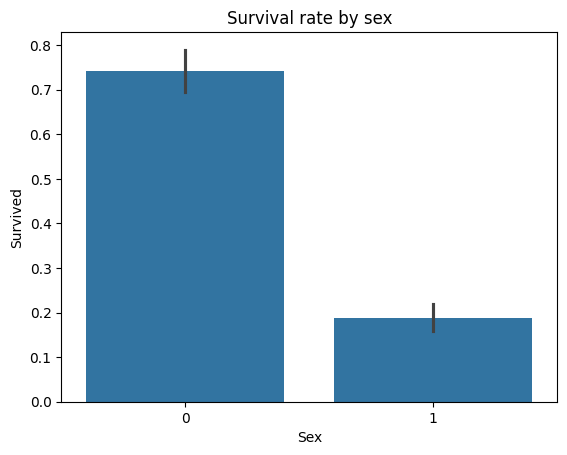

In [249]:
sns.barplot(x="Sex", y="Survived", data=data)
plt.title("Survival rate by sex")
plt.show()

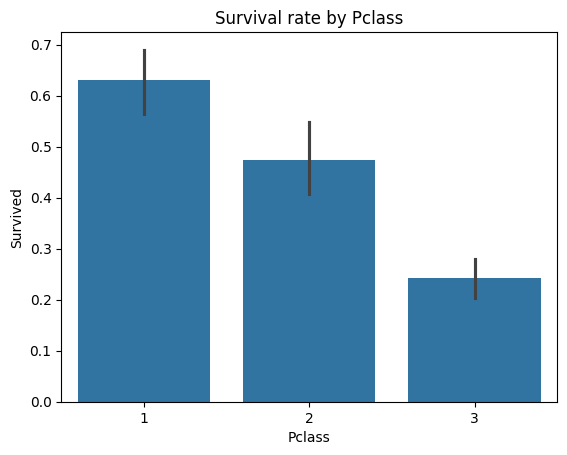

In [250]:
sns.barplot(x="Pclass", y="Survived", data=data)
plt.title("Survival rate by Pclass")
plt.show()

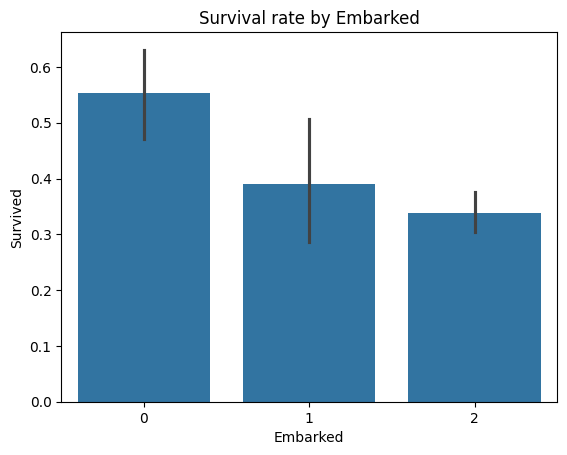

In [251]:
sns.barplot(x="Embarked", y="Survived", data=data)
plt.title("Survival rate by Embarked")
plt.show()

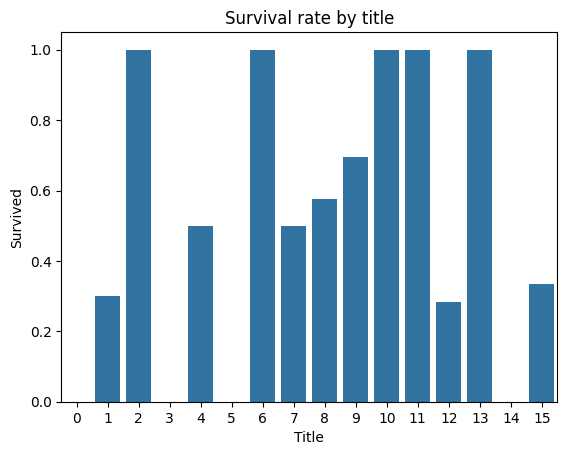

In [252]:
sns.barplot(x="Title", y="Survived", data=data , errorbar=None)
plt.title("Survival rate by title")
plt.show()

##  Partie 5 – Arbre de Décision


12 - Entraînez un 
DecisionTreeClassifier
 (
 max_depth=4
 ). Affichez l’arbre avec 
plot_tree
 ou
 graphviz
 .

[Text(0.5089285714285714, 0.9, 'x[1] <= 0.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]'),
 Text(0.2857142857142857, 0.7, 'x[0] <= 2.5\ngini = 0.396\nsamples = 213\nvalue = [58, 155]'),
 Text(0.39732142857142855, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[2] <= -2.064\ngini = 0.07\nsamples = 110\nvalue = [4, 106]'),
 Text(0.07142857142857142, 0.3, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21428571428571427, 0.3, 'x[5] <= 2.352\ngini = 0.054\nsamples = 108\nvalue = [3, 105]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.041\nsamples = 96\nvalue = [2, 94]'),
 Text(0.25, 0.1, 'gini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.42857142857142855, 0.5, 'x[5] <= -0.178\ngini = 0.499\nsamples = 103\nvalue = [54, 49]'),
 Text(0.35714285714285715, 0.3, 'x[2] <= 0.549\ngini = 0.492\nsamples = 85\nvalue = [37,

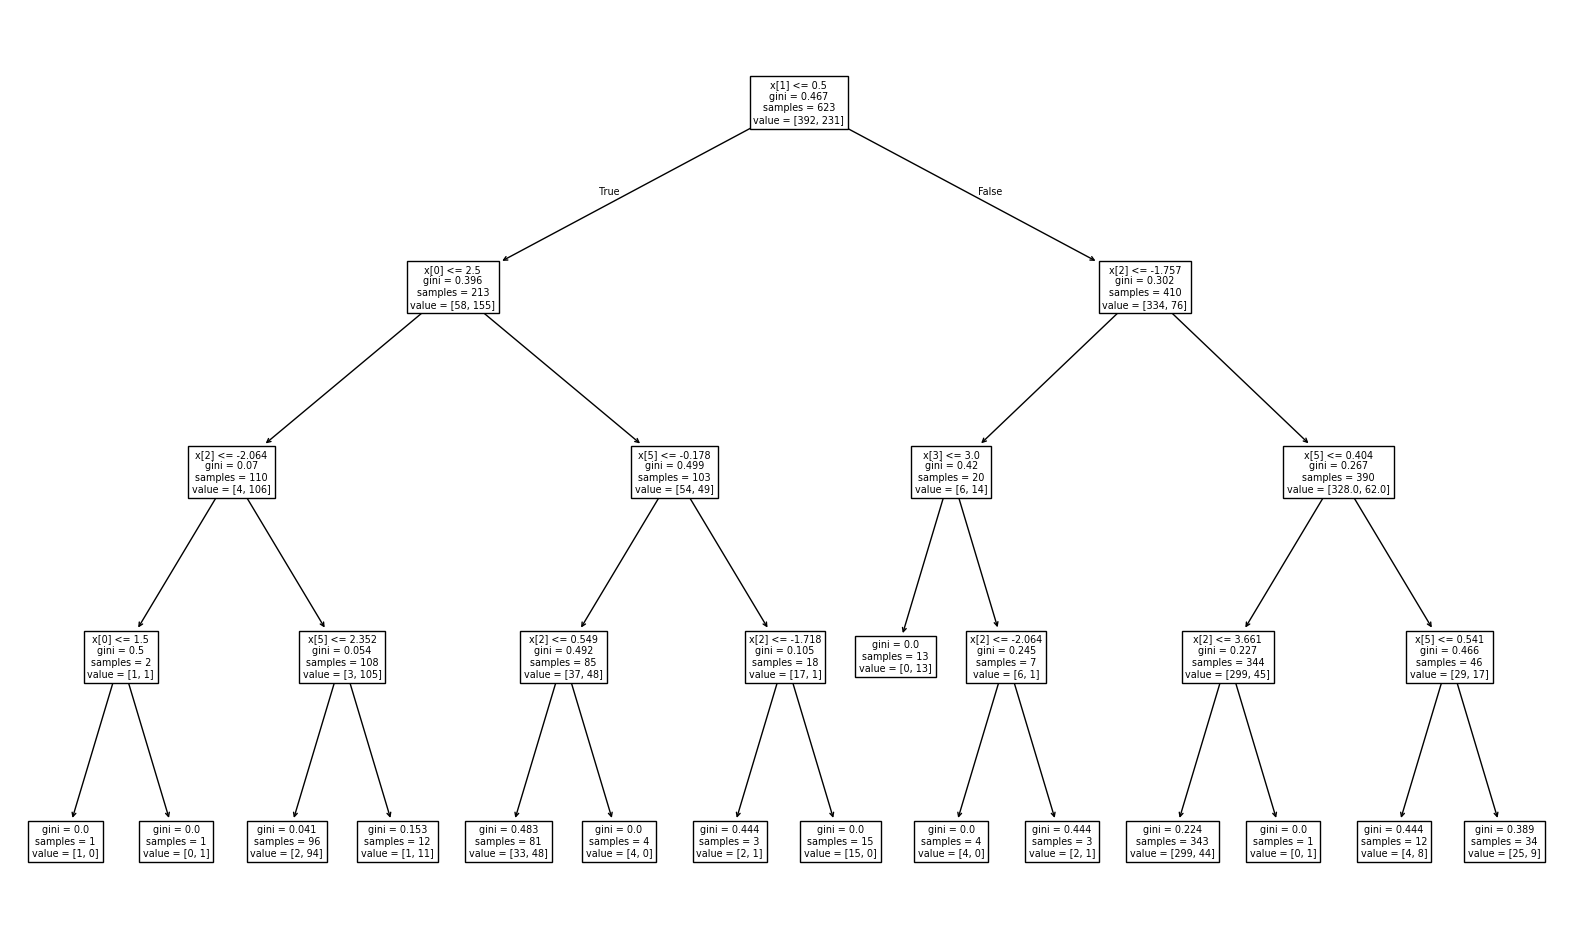

In [253]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

arbre_decision = DecisionTreeClassifier(max_depth=4)
arbre_decision.fit(X_train, y_train)
plt.figure(figsize=(20, 12))
plot_tree(arbre_decision)



13.  Évaluez le modèle avec :
 Accuracy
 Précision
 Rappel
 F1-score
 Matrice de confusion
 Courbe ROC

In [254]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Faire des prédictions
y_pred = arbre_decision.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

Accuracy: 0.8208955223880597
Precision: 0.8247422680412371
Recall: 0.7207207207207207
F1 Score: 0.7692307692307693
ROC AUC: 0.8062202329718253


ROC AUC: 0.815688299764733


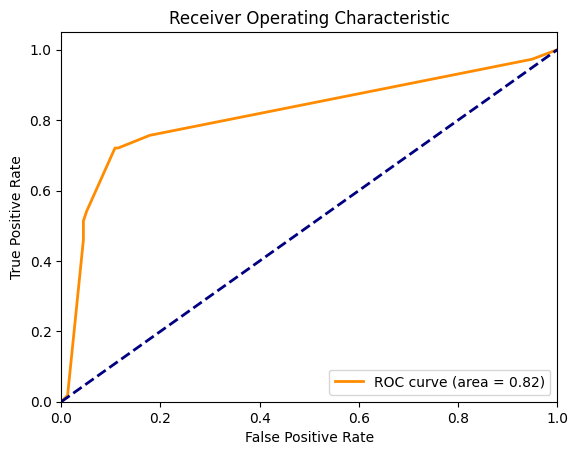

In [255]:
#courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


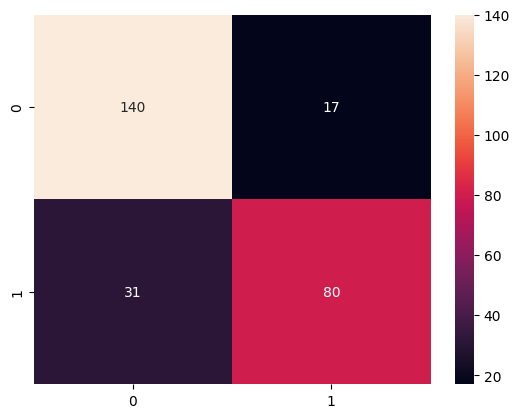

In [256]:
#matrice de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

#heatmap de la matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()

## Partie 6 – Random Forest

 14. Entraînez une 
RandomForestClassifier
 avec 100 arbres. Même split que précédemment.

In [257]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=4 , n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

15. Comparez les performances de la Random Forest avec l’arbre de décision sur toutes les métriques.

In [258]:
y_pred_tree = arbre_decision.predict(X_test)

y_pred_forest = random_forest.predict(X_test)

acc_tree = accuracy_score(y_test, y_pred_tree)
acc_forest = accuracy_score(y_test, y_pred_forest)

f1_tree = f1_score(y_test, y_pred_tree)
f1_forest = f1_score(y_test, y_pred_forest)

matrice_confusion_tree = confusion_matrix(y_test, y_pred_tree)
matrice_confusion_forest = confusion_matrix(y_test, y_pred_forest)

print("Accuracy Tree:", acc_tree)
print("Accuracy Forest:", acc_forest)
print("F1 Tree:", f1_tree)
print("F1 Forest:", f1_forest)
print("Matrice de confusion Tree:\n", matrice_confusion_tree)
print("Matrice de confusion Forest:\n", matrice_confusion_forest)



Accuracy Tree: 0.8208955223880597
Accuracy Forest: 0.8171641791044776
F1 Tree: 0.7692307692307693
F1 Forest: 0.7487179487179487
Matrice de confusion Tree:
 [[140  17]
 [ 31  80]]
Matrice de confusion Forest:
 [[146  11]
 [ 38  73]]


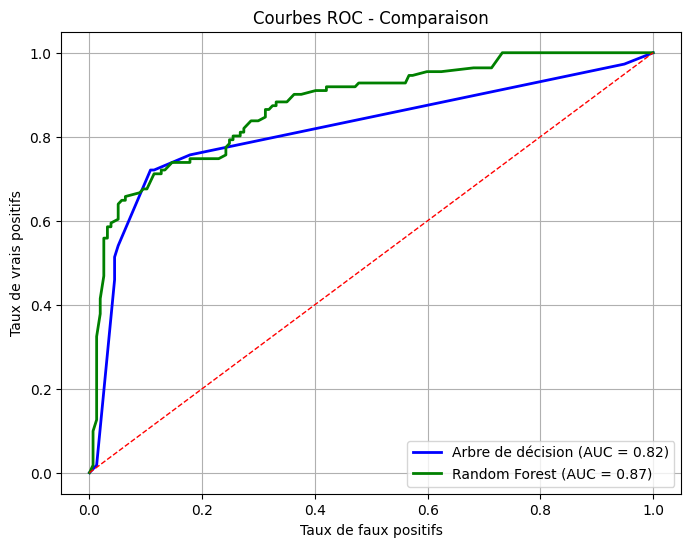

In [259]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Pour l'arbre de décision
#courbe ROC
y_score_tree = arbre_decision.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)


# Pour la forêt aléatoire
y_score_forest = forest.predict_proba(X_test)[:, 1]
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_score_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

# Calcul des AUC
auc_tree = roc_auc_score(y_test, y_score_tree)
auc_rf = roc_auc_score(y_test, y_score_forest)

# Tracer les deux courbes sur le même graphique
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label='Arbre de décision (AUC = %0.2f)' % roc_auc_tree)
plt.plot(fpr_forest, tpr_forest, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_forest)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')

# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC - Comparaison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


16. Affichez 
feature_importances_
 . Quelles sont les 3 variables les plus importantes ?

In [260]:
import pandas as pd

# Importance des variables dans la Random Forest
importances = forest.feature_importances_

# Associer les noms de colonnes
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Trier par importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


    Feature  Importance
5      Fare    0.263719
2       Age    0.227370
1       Sex    0.222242
0    Pclass    0.079923
7     Title    0.068271
3     SibSp    0.058981
4     Parch    0.040084
6  Embarked    0.039410


C:\Users\randy\AppData\Local\Temp\ipykernel_17880\2525608923.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', orient='h')


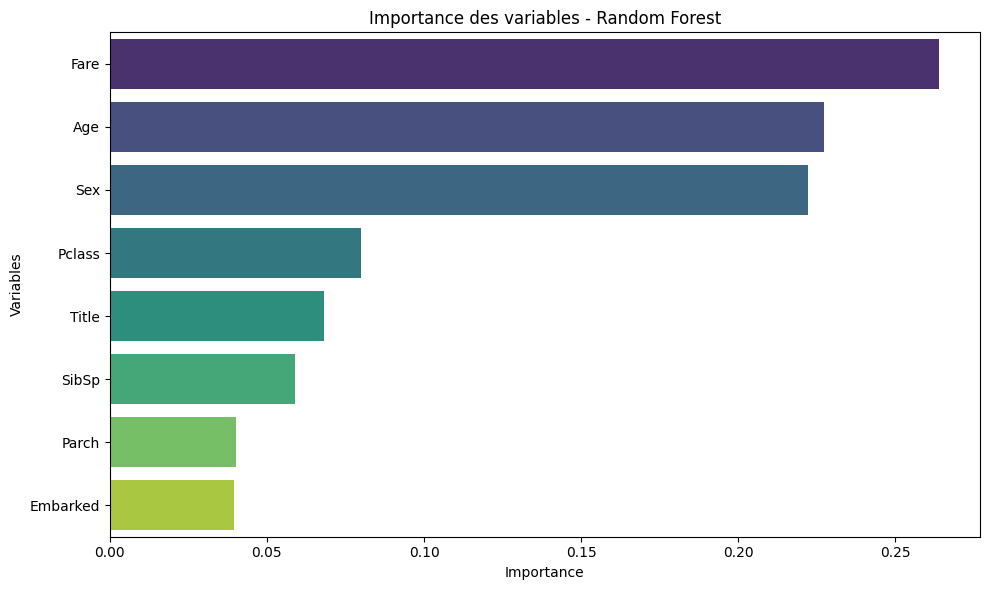

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', orient='h')
plt.title('Importance des variables - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


## Partie 7 – Analyse & Optimisation

17. Faites varier 
max_depth
 entre 1 et 10 pour l’arbre. Tracez l’évolution de l’accuracy en train/test

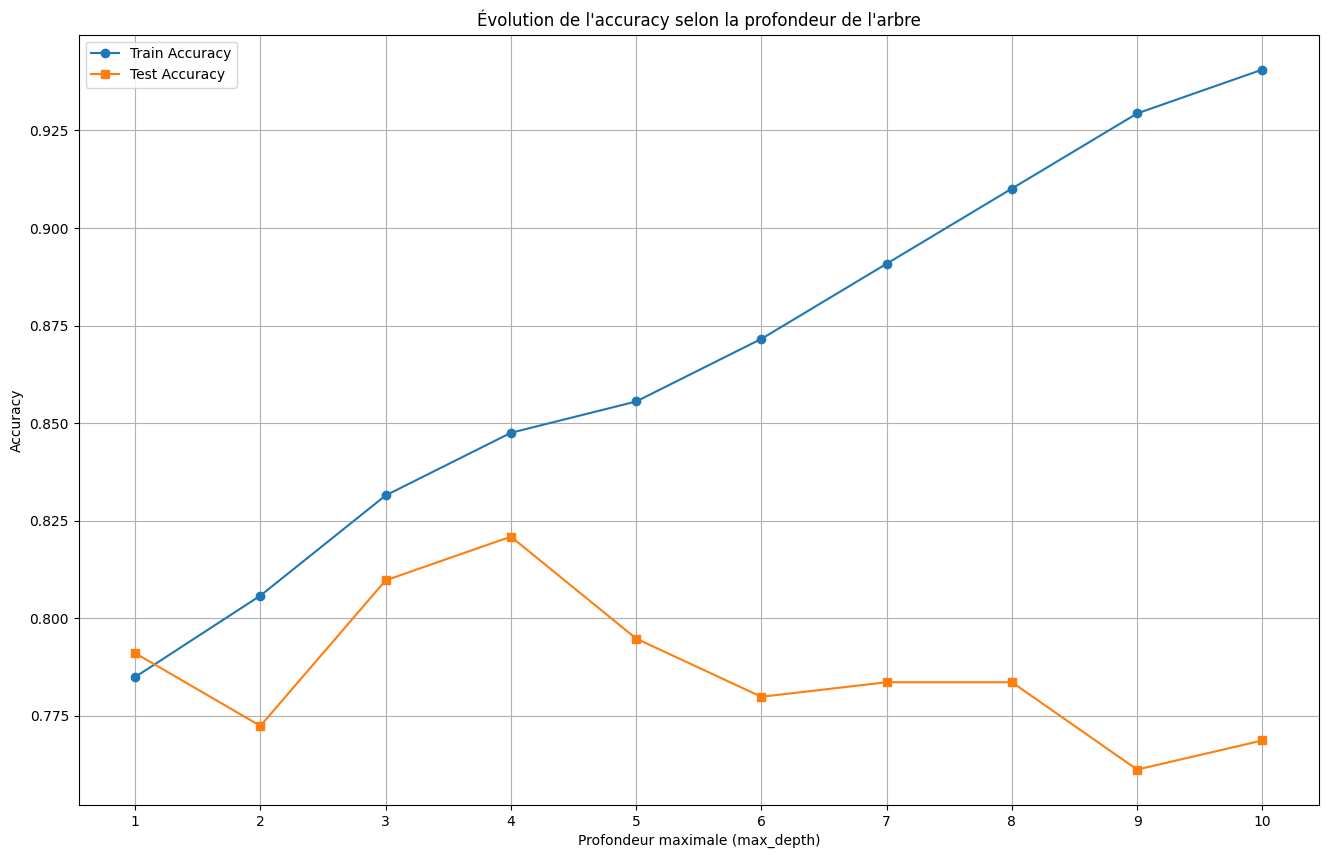

In [262]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_accuracies = []
test_accuracies = []
depths = range(1, 11)

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)

    # Accuracy sur les deux ensembles
    train_acc = accuracy_score(y_train, tree.predict(X_train))
    test_acc = accuracy_score(y_test, tree.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Tracer
plt.figure(figsize=(16, 10))
plt.plot(depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Profondeur maximale (max_depth)')
plt.ylabel('Accuracy')
plt.title("Évolution de l'accuracy selon la profondeur de l'arbre")
plt.legend()
plt.grid(True)
plt.xticks(depths)
plt.show()


18. Utilisez 
cross_val_score
 pour comparer la stabilité des deux modèles

In [263]:
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(arbre_decision, X, y, cv=5, scoring='accuracy')
scores_forest = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy')

print("Accuracy Tree: ", scores_tree.mean())
print("Accuracy Forest: ", scores_forest.mean())

Accuracy Tree:  0.805881614462369
Accuracy Forest:  0.8170736300295023


 19. Effectuez un 
GridSearchCV
 sur la Random Forest (
 max_depth
 , 
min_samples_split
 ,
 n_estimators
 ). Quel est le meilleur modèle 

In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Grille de recherche
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}


# Grid Search avec validation croisée 5 plis
grid_search = GridSearchCV(estimator=random_forest,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# Lancer la recherche
grid_search.fit(X, y)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [265]:
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleure accuracy :", grid_search.best_score_)

Meilleurs hyperparamètres : {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Meilleure accuracy : 0.8350386039796623
